In [ ]:
'''
SANKET KURLE
Task 2 LGMVIP DataScience
Stock Market Prediction And Forecasting Using Stacked LSTM

'''

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import io
df = pd.read_csv(io.BytesIO(uploaded['stocks.csv']))
print(df)


Saving stocks.csv to stocks (2).csv
            Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-09-28  234.05  235.95  ...  233.75               3069914          7162.35
1     2018-09-27  234.55  236.80  ...  233.25               5082859         11859.95
2     2018-09-26  240.00  240.00  ...  234.25               2240909          5248.60
3     2018-09-25  233.30  236.75  ...  236.10               2349368          5503.90
4     2018-09-24  233.55  239.20  ...  233.30               3423509          7999.55
...          ...     ...     ...  ...     ...                   ...              ...
2030  2010-07-27  117.60  119.50  ...  118.65                586100           694.98
2031  2010-07-26  120.10  121.00  ...  117.60                658440           780.01
2032  2010-07-23  121.80  121.95  ...  120.65                281312           340.31
2033  2010-07-22  120.30  122.00  ...  120.90                293312           355.17
2034  2010-07-21  122.10  123

In [ ]:
import matplotlib. pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
#importing libraries

from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [ ]:
print(df. shape)

print(df.isnull().values.any())

(2035, 8)
False


In [ ]:
df.head

<bound method NDFrame.head of             Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-09-28  234.05  235.95  ...  233.75               3069914          7162.35
1     2018-09-27  234.55  236.80  ...  233.25               5082859         11859.95
2     2018-09-26  240.00  240.00  ...  234.25               2240909          5248.60
3     2018-09-25  233.30  236.75  ...  236.10               2349368          5503.90
4     2018-09-24  233.55  239.20  ...  233.30               3423509          7999.55
...          ...     ...     ...  ...     ...                   ...              ...
2030  2010-07-27  117.60  119.50  ...  118.65                586100           694.98
2031  2010-07-26  120.10  121.00  ...  117.60                658440           780.01
2032  2010-07-23  121.80  121.95  ...  120.65                281312           340.31
2033  2010-07-22  120.30  122.00  ...  120.90                293312           355.17
2034  2010-07-21  122.10  123.00  .

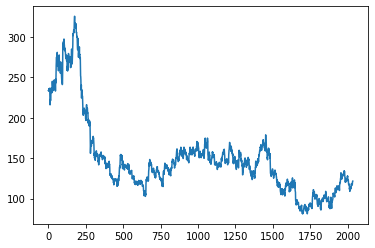

In [ ]:
#Plotting the True Adjusted Close Value 
df['Close'].plot()

In [ ]:
#Setting the Target Variable and Selecting the Features
output_var = pd.DataFrame(df['Close'])

In [ ]:
features = ['Open', 'High', 'Low', 'Turnover (Lacs)']


In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Turnover (Lacs)
0,0.620235,0.622688,0.621560,0.127882
1,0.622263,0.626144,0.625285,0.212192
2,0.644363,0.639154,0.631078,0.093535
3,0.617194,0.625940,0.629009,0.098117
4,0.618208,0.635902,0.623836,0.142907


In [ ]:
#Training and Testing Data
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

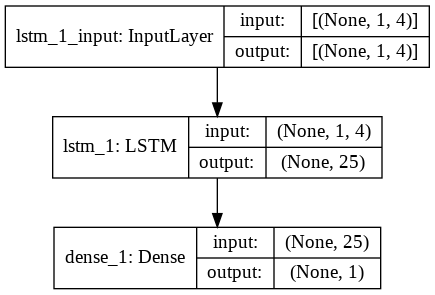

In [61]:
#processing the data for lstm
lstm = Sequential()
lstm.add(LSTM(25, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)


In [62]:
#training the model
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, s
huffle=False)

Epoch 1/100
232/232 [==============================] - 2s 2ms/step - loss: 25814.8145
Epoch 2/100
232/232 [==============================] - 0s 2ms/step - loss: 25305.3066
Epoch 3/100
232/232 [==============================] - 0s 2ms/step - loss: 23829.9316
Epoch 4/100
232/232 [==============================] - 0s 2ms/step - loss: 21284.6094
Epoch 5/100
232/232 [==============================] - 0s 2ms/step - loss: 18071.1855
Epoch 6/100
232/232 [==============================] - 0s 2ms/step - loss: 14642.7988
Epoch 7/100
232/232 [==============================] - 0s 2ms/step - loss: 11326.6768
Epoch 8/100
232/232 [==============================] - 0s 2ms/step - loss: 8339.7754
Epoch 9/100
232/232 [==============================] - 0s 2ms/step - loss: 5814.7510
Epoch 10/100
232/232 [==============================] - 0s 2ms/step - loss: 3813.2915
Epoch 11/100
232/232 [==============================] - 0s 2ms/step - loss: 2328.8362
Epoch 12/100
232/232 [==============================] - 

In [63]:
#LSTM PREICTION
y_pred= lstm.predict(X_test)
y_pred

array([[101.83712 ],
       [102.7678  ],
       [107.08593 ],
       [107.44911 ],
       [105.78764 ],
       [105.219406],
       [101.23131 ],
       [ 98.70108 ],
       [ 97.179306],
       [ 97.05464 ],
       [ 97.40439 ],
       [ 97.91863 ],
       [ 99.09023 ],
       [ 98.41609 ],
       [ 97.65308 ],
       [ 98.15293 ],
       [ 98.40105 ],
       [ 98.022705],
       [ 97.90701 ],
       [ 99.46333 ],
       [ 99.22794 ],
       [102.49324 ],
       [ 99.8741  ],
       [ 95.90674 ],
       [ 95.68346 ],
       [ 90.655365],
       [ 89.25788 ],
       [ 90.51411 ],
       [ 90.82034 ],
       [ 90.15895 ],
       [ 87.84203 ],
       [ 88.4897  ],
       [ 92.399185],
       [ 95.91465 ],
       [ 96.18332 ],
       [ 95.08086 ],
       [ 98.58638 ],
       [ 97.34683 ],
       [ 94.897606],
       [ 94.71188 ],
       [ 92.9659  ],
       [ 89.3801  ],
       [ 87.1676  ],
       [ 90.59125 ],
       [ 94.46988 ],
       [ 96.46327 ],
       [ 95.85406 ],
       [ 96.0

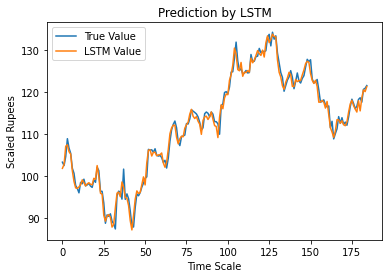

In [64]:
#True vs Predicted Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Rupees')
plt.legend()
plt.show()